# Data Science Task 3: Car Price Prediction with Machine Learning

## Problem statement:
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

# Uploading the datasets 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# uploading the data file 
file = r"C:\Users\Kabelo\Documents\Minds\Oasis Infobyte\Oasis Infobyte Projects\Task 3\car data.csv"
car_df = pd.read_csv(file)
print(car_df.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


## Understanding the datset

In [3]:
print(car_df.shape)

(301, 9)


In [4]:
print(car_df. info())
print(car_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


**NOTE:** To get the concise summary of the datset, info(), this helps us to check the column, and the presence of missing values. To ensure there are no missing valueve ], the isnull() and sum() functions were use. Thus,  confirms the data has no missing values. Now we understand that we have 4 string columns and 5 numeric columns 


In [5]:
# check the unique items  and thier distibution in categorical columns
print(car_df[["Fuel_Type","Selling_type","Transmission" ]].value_counts())

Fuel_Type  Selling_type  Transmission
Petrol     Dealer        Manual          116
           Individual    Manual           95
Diesel     Dealer        Manual           48
Petrol     Dealer        Automatic        18
Diesel     Dealer        Automatic        11
Petrol     Individual    Automatic        10
CNG        Dealer        Manual            2
Diesel     Individual    Automatic         1
dtype: int64


In [6]:
print(car_df.describe().T)

               count          mean           std      min      25%      50%  \
Year           301.0   2013.627907      2.891554  2003.00   2012.0   2014.0   
Selling_Price  301.0      4.661296      5.082812     0.10      0.9      3.6   
Present_Price  301.0      7.628472      8.642584     0.32      1.2      6.4   
Driven_kms     301.0  36947.205980  38886.883882   500.00  15000.0  32000.0   
Owner          301.0      0.043189      0.247915     0.00      0.0      0.0   

                   75%       max  
Year            2016.0    2018.0  
Selling_Price      6.0      35.0  
Present_Price      9.9      92.6  
Driven_kms     48767.0  500000.0  
Owner              0.0       3.0  


# Data Preprocessing
**Before we train the ML model, we nee to enure the data is ready. Thus, the outliers must be remover, if present, all categorical data must be encoded, x and y must be separed , and redudnat columns must be removed.**

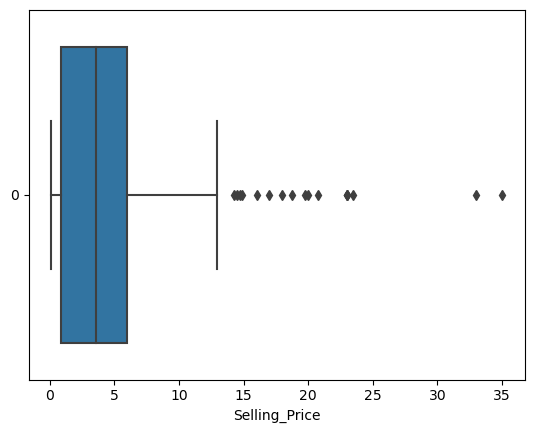

In [7]:
#checking for outliers
sns.boxplot(car_df["Selling_Price"], orient = "h")
plt.xlabel('Selling_Price')
plt.show()
    


In [8]:
# Remobing outliers 
print(sorted(car_df["Selling_Price"], reverse = True))

[35.0, 33.0, 23.5, 23.0, 23.0, 23.0, 20.75, 19.99, 19.75, 18.75, 18.0, 17.0, 16.0, 14.9, 14.73, 14.5, 14.25, 12.9, 12.5, 11.75, 11.5, 11.45, 11.25, 11.25, 11.25, 10.9, 10.25, 10.11, 9.7, 9.65, 9.5, 9.25, 9.25, 9.25, 9.15, 9.1, 8.99, 8.75, 8.65, 8.55, 8.5, 8.4, 8.4, 8.35, 8.25, 8.25, 7.9, 7.75, 7.75, 7.75, 7.5, 7.5, 7.5, 7.45, 7.45, 7.45, 7.4, 7.25, 7.25, 7.2, 7.05, 6.95, 6.85, 6.75, 6.7, 6.6, 6.5, 6.5, 6.45, 6.4, 6.25, 6.25, 6.15, 6.1, 6.0, 6.0, 6.0, 6.0, 5.95, 5.95, 5.9, 5.85, 5.85, 5.8, 5.75, 5.75, 5.65, 5.5, 5.5, 5.5, 5.5, 5.5, 5.4, 5.4, 5.35, 5.3, 5.3, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.2, 5.15, 5.11, 5.0, 4.95, 4.95, 4.9, 4.9, 4.85, 4.8, 4.8, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.65, 4.6, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.4, 4.4, 4.4, 4.35, 4.15, 4.1, 4.1, 4.0, 4.0, 4.0, 4.0, 4.0, 3.95, 3.95, 3.9, 3.9, 3.8, 3.75, 3.75, 3.65, 3.6, 3.51, 3.5, 3.5, 3.49, 3.45, 3.35, 3.35, 3.25, 3.25, 3.25, 3.15, 3.1, 3.1, 3.1, 3.1, 3.0, 3.0, 3.0, 3.0, 2.95, 2.95, 2.9, 2.9, 2.9, 2.85, 2.85

In [9]:
# Filtering the outliers out
car_df = car_df[~(car_df["Selling_Price"]>=33.0) & (car_df["Selling_Price"]<=35.0)]
print(car_df.shape )

(299, 9)


**The outliers have been removed as show by a decresase in number of rows from 301 to 299**

In [10]:
# Adiding "Vehicle_ Age" column and droping the "Year" column
import datetime
present_year = datetime.datetime.now().year
car_df["Vehicle_Age"] = present_year -car_df["Year"]
car_df.drop("Year", axis =1, inplace = True)
print(car_df.columns)

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Vehicle_Age'],
      dtype='object')


## Encoding categorical columns

**From the output, we can see that fuel type as 3 items namely Diesel, Petrol, and CNG. Seller type: individual and Dealer, while Transmission is Manual and Automatic.**

In [11]:
# encoding the respective columns
car_df["Fuel_Type"] = car_df["Fuel_Type"].map({"Petrol": 0, "Diesel": 1, "CNG": 2})
car_df["Selling_type"] = car_df["Selling_type"].map({"Dealer": 0, "Individual": 1})
car_df["Transmission"] = car_df["Transmission"].map({"Manual": 0, "Automatic": 1})

In [12]:
print(car_df.head(2))

  Car_Name  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0     ritz           3.35           5.59       27000          0             0   
1      sx4           4.75           9.54       43000          1             0   

   Transmission  Owner  Vehicle_Age  
0             0      0           10  
1             0      0           11  


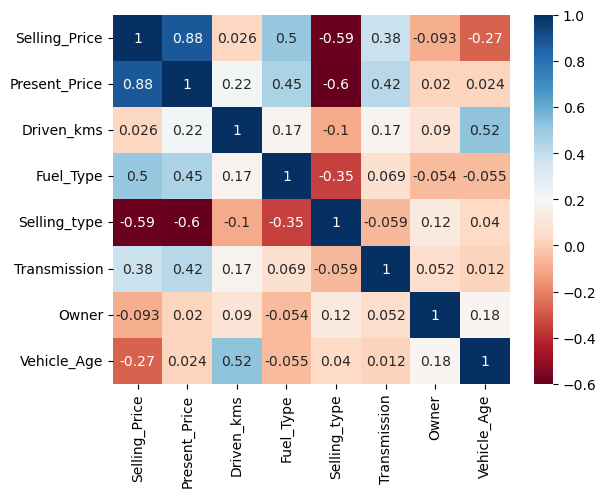

In [13]:
#Visualizing corrections between variables
corr = car_df.drop("Car_Name", axis=1).corr()
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

# Machine Learning Model Training 

**IMPORTING REQUIRED MODULES:**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Defining X & Y variables and Scaling the data:**

In [15]:
# Defining the x and y variables
X = car_df.drop(["Car_Name", "Selling_Price"], axis=1)
y = car_df["Selling_Price"]
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=20)

In [16]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train the models:**

In [17]:
# Training Liner Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Training Gradient Booting Regressor Model
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

# Taring Random Fostest Regressor Model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)


RandomForestRegressor()

**Testing the model**

In [18]:
y_pred_lr = linear_reg.predict(X_test)
y_pred_gb = gb_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

**Evaluating the models**
- Evaluating the models will help us determing the best model

In [19]:
# determing the value of r2_score metric 
lr_score = metrics.r2_score(y_test, y_pred_lr)
gb_score = metrics.r2_score(y_test, y_pred_gb)
rf_score = metrics.r2_score(y_test, y_pred_rf)

#creating a pandas dataframe to have better view of the results
model_score_df = pd.DataFrame({"MODELS": ["Linear Regression", "Gradient Boosting", "Random Forest"],
             "SCORES" : [ lr_score, gb_score, rf_score]})
# Viewing the rscores
print(model_score_df)

              MODELS    SCORES
0  Linear Regression  0.903626
1  Gradient Boosting  0.963916
2      Random Forest  0.965233


**According to the tabulated results, Random Forest is the best model. Thus, this model will be used for car price prediction**

In [20]:
# Traing the whole data
rf_model = RandomForestRegressor()
rf_model.fit(X,y)

# Saving the model 
import joblib
joblib.dump(rf_model, "Car_price_Predictor")

['Car_price_Predictor']